# Assignment 7
# K-means clustering and PCA

In [ ]:
import os
import numpy as np
import re
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
from IPython.display import HTML, display, clear_output
try:
    pyplot.rcParams["animation.html"] = "jshtml"
except ValueError:
    pyplot.rcParams["animation.html"] = "html5"

# Optimization module in scipy
from scipy.optimize import minimize

# will be used to load MATLAB mat datafile format
from scipy.io import loadmat

In [ ]:
data = loadmat('ex7data2.mat')
X = data['X']
X[1, :]
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

FileNotFoundError: [Errno 2] No such file or directory: 'ex7data2.mat'

#### 1.1 Calculating closest centroid

In [ ]:
def find_closest_centroids(X, centroids):
    indices = []
    for sample in X:
        distances = []
        for centroid in centroids:
            dist = np.sqrt((sample[0] - centroid[0])**2 + (sample[1] - centroid[1])**2)
            distances.append(dist)
        indices.append(np.array(distances).argmin())

    return np.array(indices)  

In [ ]:
# Select an initial set of centroids
K = 3   # 3 Centroids
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

# Find the closest centroids for the examples using the initial_centroids
idx = find_closest_centroids(X, initial_centroids)

print('Closest centroids for the first 3 examples:')
print(idx[:3])
print('(the closest centroids should be 0, 2, 1 respectively)')

Closest centroids for the first 3 examples:
[0 2 1]
(the closest centroids should be 0, 2, 1 respectively)


#### 1.2 Calculating centroid means

In [ ]:
def compute_centroids(X, idx, K):
    C = []
    for k in range(K):
        C.append(np.mean(X[idx == k], axis=0))
    return np.array(C)
        

In [ ]:
# Compute means based on the closest centroids found in the previous part.
centroids = compute_centroids(X, idx, K)

print('Centroids computed after initial finding of closest centroids:')
print(centroids)
print('\nThe centroids should be')
print('   [ 2.428301 3.157924 ]')
print('   [ 5.813503 2.633656 ]')
print('   [ 7.119387 3.616684 ]')

Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]

The centroids should be
   [ 2.428301 3.157924 ]
   [ 5.813503 2.633656 ]
   [ 7.119387 3.616684 ]


#### 1.3 Run K-means

In [ ]:
def run_k_means(X, K, centroids, iterations):
    centroids_history = [centroids]
    for i in range(iterations):
        centroid_indices = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, centroid_indices, K)
        centroids_history.append(centroids)
    return centroids, centroid_indices, centroids_history

In [ ]:
# Load an example dataset
data = loadmat('data/ex7data2.mat')

# Settings for running K-Means
K = 3
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

centroids, centroid_indices, centroids_history = run_k_means(X, K, initial_centroids, max_iters)

#### 1.4 Visualization

#### 1.5 Random Initialization

In [ ]:
def random_init_centroids(X, K):
    rand_indices = np.arange(len(X))
    np.random.shuffle(rand_indices)
    centroids = X[rand_indices][:K]
    return centroids

In [ ]:
initial_centroids = random_init_centroids(X, 3)

centroids, centroid_indices, centroids_history = run_k_means(X, K, initial_centroids, max_iters)

### 2. K Means to compress an image

#### 2.1 Load image data

In [ ]:
img = mpl.image.imread('data/bird_small.png')

In [ ]:
A = img

In [ ]:
K = 16
max_iters = 10

# Load an image of a bird
# Change the file name and path to experiment with your own images
A /= 255
X = A.reshape(-1, 3)

In [ ]:
# Initialize centroids randomly
initial_centroids = random_init_centroids(X, K)

# Run K-Means
centroids, idx, _ = run_k_means(X, K, initial_centroids, max_iters)

#### 2.3 Recover Image

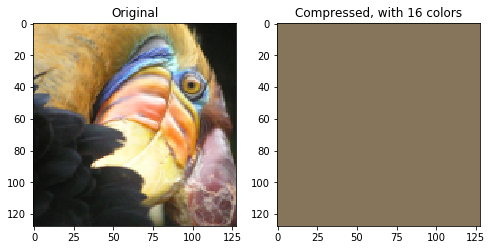

In [ ]:
# We can now recover the image from the indices (idx) by mapping each pixel
# (specified by its index in idx) to the centroid value
# Reshape the recovered image into proper dimensions
X_recovered = centroids[idx, :].reshape(A.shape)

# Display the original image, rescale back by 255
fig, ax = pyplot.subplots(1, 2, figsize=(8, 4))
ax[0].imshow(A*255)
ax[0].set_title('Original')
ax[0].grid(False)

# Display compressed image, rescale back by 255
ax[1].imshow(X_recovered*255)
ax[1].set_title('Compressed, with %d colors' % K)
ax[1].grid(False)

## Principal Component Analysis

Load data

In [ ]:
data = loadmat('data/ex7data1.mat')

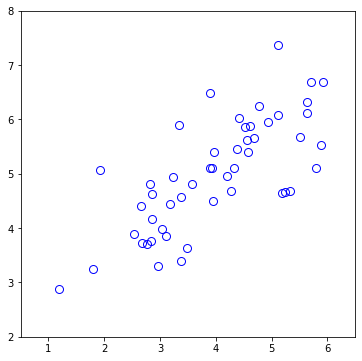

In [ ]:
X = data['X']
M = len(X)

pyplot.figure(figsize=(6, 6))
pyplot.plot(X.T[0], X.T[1], 'bo', mfc='none', mec='b', ms=8)
pyplot.xlim(0.5, 6.5)
pyplot.ylim(2, 8)
pyplot.savefig('data/fig4.jpg')
pyplot.show()



In [ ]:
X.shape

(50, 2)

### 2.1 Decomposing into lower dimension

In [ ]:
def pca(X):
    Sigma = 1 / M * X.T.dot(X)
    U, S, V = np.linalg.svd(Sigma)
    return U, S, V

In [ ]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    sig = np.std(X, axis=0)
    X_norm = (X - mu) / sig
    return X_norm, mu, sig

In [ ]:
X_norm, mu, sig = feature_normalize(X)
U, S, V = pca(X_norm)

top eigenvector: [-0.70710678 -0.70710678]


Top eigenvector: U[:, 0] = [-0.707107 -0.707107]
 (you should expect to see [-0.707107 -0.707107])


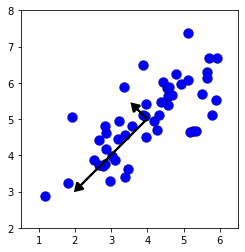

In [ ]:

#  Draw the eigenvectors centered at mean of data. These lines show the
#  directions of maximum variations in the dataset.
fig, ax = pyplot.subplots()
ax.plot(X[:, 0], X[:, 1], 'bo', ms=10, mec='k', mew=0.25)

for i in range(2):
    ax.arrow(mu[0], mu[1], 1.5 * S[i]*U[0, i], 1.5 * S[i]*U[1, i],
             head_width=0.25, head_length=0.2, fc='k', ec='k', lw=2, zorder=1000)

ax.axis([0.5, 6.5, 2, 8])
ax.set_aspect('equal')
ax.grid(False)

print('Top eigenvector: U[:, 0] = [{:.6f} {:.6f}]'.format(U[0, 0], U[1, 0]))
print(' (you should expect to see [-0.707107 -0.707107])')

In [ ]:
n = (U).T
n[:, 1]

array([-0.70710678,  0.70710678])

In [ ]:
def project_data(X, U, K):
    U = (U[:, :K])
    z = X.dot(U)
    return z

In [ ]:
#  Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)
print('Projection of the first example: {:.6f}'.format(Z[0, 0]))
print('(this value should be about    : 1.481274)')

Projection of the first example: 1.496313
(this value should be about    : 1.481274)


### 2.2 Recovering data

In [ ]:
def recover_data(Z, U, K):
    U_reduce = U[:, :K]
    X_approx = Z.dot((U_reduce.T))
    return X_approx

Approximation of the first example: [-1.058053 -1.058053]
       (this value should be about  [-1.047419 -1.047419])


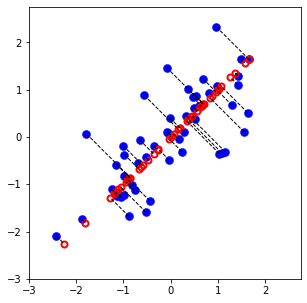

In [ ]:
X_rec  = recover_data(Z, U, K)
print('Approximation of the first example: [{:.6f} {:.6f}]'.format(X_rec[0, 0], X_rec[0, 1]))
print('       (this value should be about  [-1.047419 -1.047419])')

#  Plot the normalized dataset (returned from featureNormalize)
fig, ax = pyplot.subplots(figsize=(5, 5))
ax.plot(X_norm[:, 0], X_norm[:, 1], 'bo', ms=8, mec='b', mew=0.5)
ax.set_aspect('equal')
ax.grid(False)
pyplot.axis([-3, 2.75, -3, 2.75])

# Draw lines connecting the projected points to the original points
ax.plot(X_rec[:, 0], X_rec[:, 1], 'ro', mec='r', mew=2, mfc='none')
for xnorm, xrec in zip(X_norm, X_rec):
    ax.plot([xnorm[0], xrec[0]], [xnorm[1], xrec[1]], '--k', lw=1)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=18cf4704-3790-49a3-8d94-41dc8f485b71' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>